In [ ]:
!pip install numpy, matplotlib, pandas, prody, nglview

In [1]:
import prody as pd
import nglview
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

_ColormakerRegistry()

In [2]:
import pandas as pnd

In [3]:
import matplotlib as mpl
import matplotlib.cm as cm

In [4]:
from nglview.color import ColormakerRegistry as registry

## 3C-like proteinase (3CL-PRO)

Taking all the different experimentally solved structures of the 3CL-PRO protein from SARS-Cov2. These structures represent the same protein bound to different ligands (or unbound).

In [5]:
pdb_ids = "5r7y, 5r7z, 5r80, 5r81, 5r82, 5r83, 5r84, 5re4, 5re5, 5re6, 5re7, 5re8, 5re9, 5rea, 5reb, 5rec, 5red, 5ree, 5ref, 5reg, 5reh, 5rei, 5rej, 5rek, 5rel, 5rem, 5ren, 5reo, 5rep, 5rer, 5res, 5ret, 5reu, 5rev, 5rew, 5rex, 5rey, 5rez, 5rf0, 5rf1, 5rf2, 5rf3, 5rf4, 5rf5, 5rf6, 5rf7, 5rf8, 5rf9, 5rfa, 5rfb, 5rfc, 5rfd, 5rfe, 5rff, 5rfg, 5rfh, 5rfi, 5rfj, 5rfk, 5rfl, 5rfm, 5rfn, 5rfo, 5rfp, 5rfq, 5rfr, 5rfs, 5rft, 5rfu, 5rfv, 5rfw, 5rfx, 5rfy, 5rfz, 5rg0, 6lu7, 6m03, 6w63, 6y2e, 6y2f, 6y2g, 6y84, 6yb7".split(", ")

Choosing chain A as this is the only chain in most of the structures

In [6]:
pdb_to_chain = {p: "A" for p in pdb_ids}
for p in ["6y2e", "6y2f", "6y2g"]:
    pdb_to_chain[p] = "AAA"

In [7]:
structures = [pd.parseCIF(f"{x}.cif", chain=pdb_to_chain[p]) for x in pdb_ids]

@> 2698 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 2473 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2476 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2712 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2706 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2476 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2699 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2705 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2707 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2708 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2762 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2708 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2762 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2762 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 2713 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2710 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 2761 atoms and 1 coordinate set(s) we

Making an ensemble of the $\alpha$-carbons of each structure. This essentially aligns and superposes the structures on to each other allowing us to compare each atom across all structures. By default, it takes the first protein (5r7y) as the reference, and the other are aligned to this protein.

In [8]:
ensemble = pd.buildPDBEnsemble(structures, subset="calpha", title="3CL-PRO")
ensemble.iterpose()

@> Starting iterative superposition:             
@> Step #1: RMSD difference = 1.4778e-01
@> Step #2: RMSD difference = 1.8676e-05
@> Iterative superposition completed in 0.05s.
@> Final superposition to calculate transformations.
@> Superposition completed in 0.01 seconds.
@> Ensemble (83 conformations) were built in 3.05s.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 1.2606e-08
@> Iterative superposition completed in 0.01s.
@> Final superposition to calculate transformations.
@> Superposition completed in 0.01 seconds.


Calculating the overall Root Mean Square Deviation (RMSD) of each structure to the reference.

In [9]:
rmsds = pd.calcRMSD(ensemble)

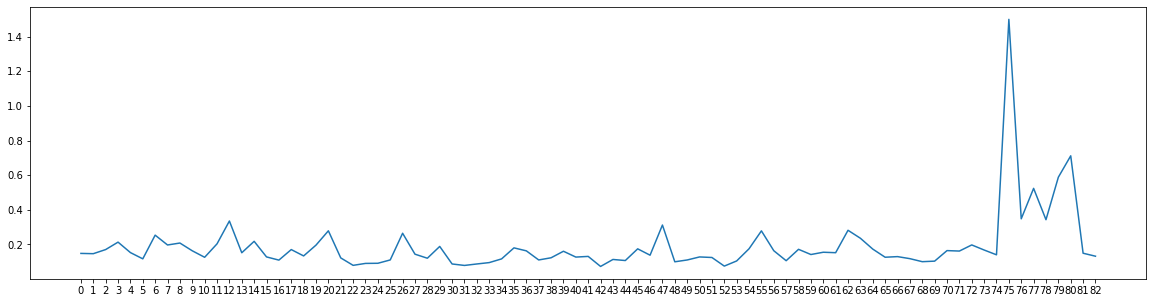

In [10]:
plt.figure(figsize=(20,5))
plt.plot(rmsds)
plt.xticks(np.arange(ensemble.numConfs()));

In [11]:
pdb_ids[np.argmax(rmsds)]

'6lu7'

6LU7 seems to be an outlier, possibly because it is unbound (no ligand in the structure).

Visualizing the differences between the structures in 2D using a PCA. To have some way of differentiating between the structures, we color them by the molecular weight of their ligand (if they have one).

In [12]:
ligand_details = pnd.read_csv("SARS-Cov-2-all-LOI.tsv", sep="\t")
ligand_details

,PDB structures complexed with Ligands of Interest (LOI),Release Date,LOI ID,LOI Molecular Weight,LOI InCHI Key
0,6LU7,2020-02-05,NaN,NaN,NaN
1,6VSB,2020-02-26,NaN,NaN,NaN
2,6LVN,2020-02-26,NaN,NaN,NaN
3,6LXT,2020-02-26,NaN,NaN,NaN
4,6VW1,2020-03-04,NAG,221.208,OVRNDRQMDRJTHS-FMDGEEDCSA-N
...,...,...,...,...,...
105,5RG0,2020-03-25,T8Y,170.209,NBQBICYRKOTWRR-UHFFFAOYSA-N
106,6YB7,2020-03-25,NaN,NaN,NaN
107,6W9C,2020-04-01,NaN,NaN,NaN
108,5R8T,2020-04-01,NaN,NaN,NaN


In [13]:
name_to_ligand_weight = {k.lower(): 0 if np.isnan(v) else v for k, v in zip(ligand_details["PDB structures complexed with Ligands of Interest (LOI)"],
                                                                            ligand_details["LOI Molecular Weight"])}

In [14]:
pca = pd.PCA("3CL-PRO")
pca.buildCovariance(ensemble)
pca.calcModes()

@> Covariance is calculated using 83 coordinate sets.
@> Covariance matrix calculated in 0.012976s.
@> 20 modes were calculated in 0.04s.


In [15]:
projection = pd.calcProjection(ensemble, pca[:2])

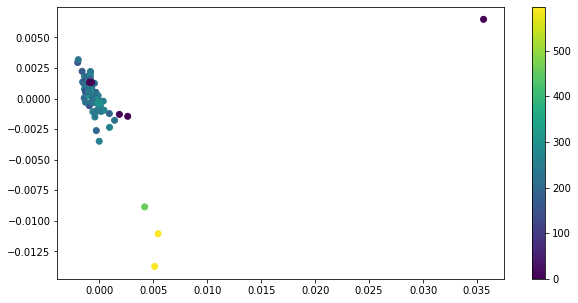

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(projection[:, 0], projection[:, 1], 
            c = [name_to_ligand_weight[n.split("_")[0]] for n in ensemble._labels])
plt.colorbar()

In [17]:
print(pdb_ids[np.where(projection[:, 0] > 0.03)[0][0]])
print([pdb_ids[i] for i in np.where(projection[:, 1] < -0.007)[0]])

6lu7
['6w63', '6y2f', '6y2g']


This shows that the outlier structures are one with no ligand (in purple, 6LU7) and three with large ligands (in light green and yellow, 6W63, 6Y2F, and 6Y2G)

Next, we look at the variability of a residue across all structures, calculated as the mean square fluctuation.

In [18]:
def getMSFs(ensemble):
    indices = ensemble._indices
    if indices is None:
        coords = ensemble._coords
        confs = ensemble._confs
        weights = ensemble._weights > 0
    else:
        coords = ensemble._coords[indices]
        confs = ensemble._confs[:, indices]
        weights = ensemble._weights[:, indices] > 0
    weightsum = weights.sum(0)
    mean = np.zeros(coords.shape)
    for i, conf in enumerate(confs):
        mean += conf * weights[i]
    mean /= weightsum
    
    ssqf = np.zeros(mean.shape)
    stds = []
    for i, conf in enumerate(confs):
        ssqf += ((conf - mean) * weights[i]) ** 2
        stds.append(((conf - mean) * weights[i]) ** 2)
    return ssqf.sum(1) / weightsum.flatten(), np.std(np.array(stds), axis=0).sum(1)

In [19]:
means, stds = getMSFs(ensemble)

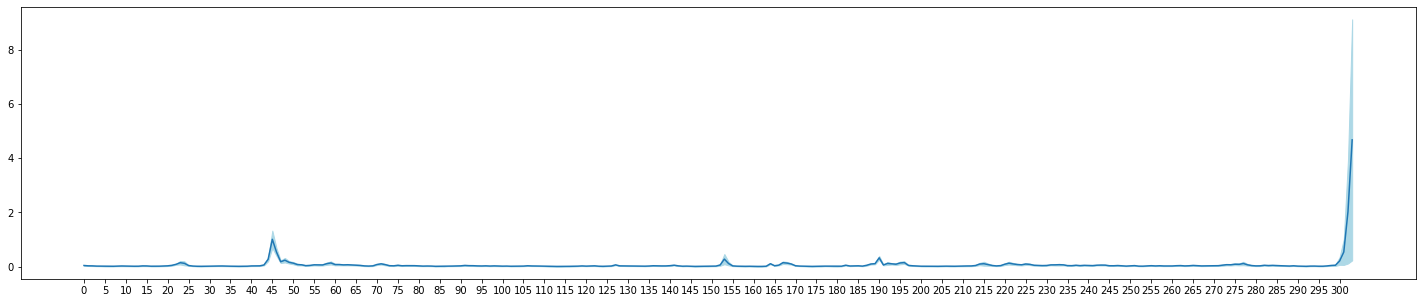

In [20]:
plt.figure(figsize=(25,5))
error = stds / np.sqrt(ensemble.numConfs())
x = np.arange(ensemble.numAtoms())
plt.plot(x, means)
plt.fill_between(x, means-error, means+error, color="lightblue")
plt.xticks(range(0, ensemble.numAtoms(), 5));

There are three small peaks and one large one at the end. We can plot this variability as a color scale on the structures (with a log transformation for easier visibility)

In [21]:
log_means = np.log1p(means)

norm = mpl.colors.Normalize(vmin=np.min(log_means), vmax=1)
cmap = cm.viridis

registry.add_scheme("variability", 
                    [[mpl.colors.rgb2hex(cmap(norm(log_means[i]))[:3]), str(i)] for i in range(ensemble.numAtoms())])

Visualizing this on the first structure 5R7Y:

In [24]:
view = nglview.show_prody(structures[0], default=False)
view.clear()
view.center()
view.add_cartoon(selection="calpha", color="variability")
view.add_representation("ball+stick", selection="hetero")
view.add_representation("ball+stick", selection="H2O", opacity=0)
view

NGLWidget()

If we ignore the C-terminus, the most variable residues are quite near the ligand. This is also clear in the movie below of the ensemble where this region moves more than the others:

In [34]:
view = nglview.show_prody(ensemble, default=False)
view.clear()
view.center()
view.add_cartoon(selection="protein", color="variability")
view

NGLWidget(max_frame=82)

We also compare this 3C-PRO to the one from SARS-Cov:

In [26]:
sars_protease = pd.parseCIF("1uj1", chain="A")

@> 2477 atoms and 1 coordinate set(s) were parsed in 0.04s.


In [31]:
ensemble_sars = pd.buildPDBEnsemble([structures[0], sars_protease], subset="calpha")

@> Starting iterative superposition:           
@> Step #1: RMSD difference = 5.4401e-01
@> Step #2: RMSD difference = 8.2119e-15
@> Iterative superposition completed in 0.00s.
@> Final superposition to calculate transformations.
@> Superposition completed in 0.00 seconds.
@> Ensemble (2 conformations) were built in 0.07s.


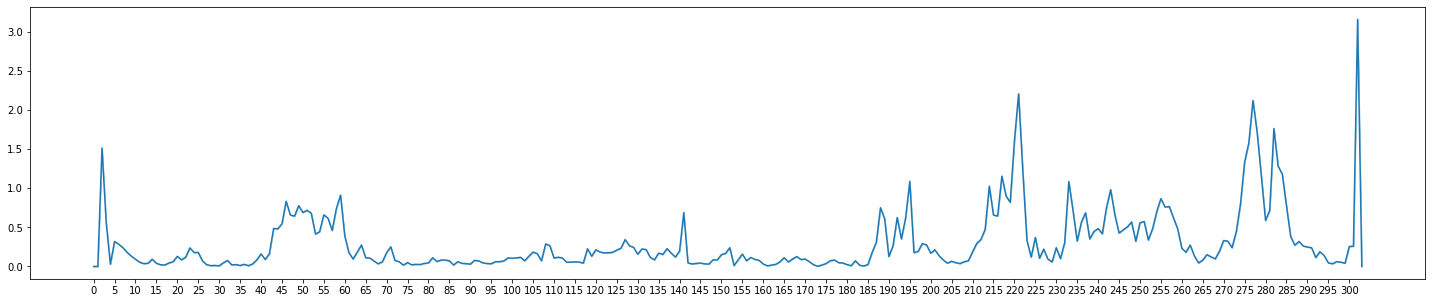

In [32]:
means, stds = getMSFs(ensemble_sars)
plt.figure(figsize=(25,5))
error = stds / np.sqrt(ensemble_sars.numConfs())
x = np.arange(ensemble_sars.numAtoms())
plt.plot(x, means)
plt.fill_between(x, means-error, means+error, color="lightblue")
plt.xticks(range(0, ensemble_sars.numAtoms(), 5));

In [33]:
view = nglview.show_prody(structures[0], default=False)
norm = mpl.colors.Normalize(vmin=np.min(means), vmax=np.max(means))
cmap = cm.viridis
registry.add_scheme("variability_sars", 
                    [[mpl.colors.rgb2hex(cmap(norm(means[i]))[:3]), str(i)] for i in range(ensemble_sars.numAtoms())])
view.clear()
view.center()
view.add_cartoon(selection="calpha", color="variability_sars")
view.add_representation("ball+stick", selection="hetero")
view

NGLWidget()